# Trabalho de Processamento Digital de Sinais (ENGC63)


- Projete, a partir de um filtro passa-baixas Butterworth de sexta ordem, um filtro discreto passa-baixas com frequência de corte (-3dB) igual ω c = 2π/3, usando o método da invariância da resposta
impulsiva (**Projeto1**) ou usando o método de transformação bilinear (**Projeto2**) 

- Faça a implementação sob forma direta e sob forma em cascata. 

- Represente os coeficientes em ponto flutuante (ex.: 0, 00423578 = 0, 423578 × 10 − 2 ) e vá diminuindo o número de casas decimais após a vı́rgula nas formas direta e em cascata para verificar a sensibilidade à quantização de parâmetros. 

- Trace a curva do módulo da resposta em freqência em dB para os casos de precisão infinita e precisão finita. 
Em seguida, para a representação em forma direta, refaça os filtros com as 3 transformações em frequência a seguir (Z − 1 = −z − 1 ; Z − 1 = z − 2 e Z − 1 = −z − 2 ) e trace a curva do módulo em dB da resposta em frequência resultante. 

- Use os seus filtros para processar um sinal de áudio de sua preferência, ouça os resultados e os avalie perceptualmente. Avalie, também, o espectro em função do tempo, do sinal de entrada e de saída utilizando um espectrograma.


In [141]:
### IMPORTS ###
import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
import math
from IPython.display import display, Math

In [160]:
def to_string(number):
    exp = np.floor(np.log10(np.abs(number))).astype(int)
    num = number * 10.0**(-exp - 1)
    return r"{0} \times 10^{{{1}}}".format(num, exp+1)
    


num = 1.266485216936955e-12
num = round(num, 12+16)
display(Math(to_string(num)))

<IPython.core.display.Math object>

TransferFunctionContinuous(
array([84.40179477]),
array([  1.        ,   8.09212128,  32.7412134 ,  83.98447537,
       143.61903283, 155.70294881,  84.40179477]),
dt: None
)
TransferFunctionDiscrete(
array([1.26648522e-12, 7.59891130e-12, 1.89972783e-11, 2.53297043e-11,
       1.89972783e-11, 7.59891130e-12, 1.26648522e-12]),
array([  1.        ,  -5.91908204,  14.59867754, -19.20380635,
        14.2101756 ,  -5.6082321 ,   0.92226735]),
dt: True
)
ZerosPolesGainDiscrete(
array([-1.00296841+0.j        , -1.00148317+0.00257069j,
       -1.00148317-0.00257069j, -0.99851584+0.00256896j,
       -0.99851584-0.00256896j, -0.99703359+0.j        ]),
array([0.99439072+0.02011853j, 0.99439072-0.02011853j,
       0.98519414+0.01459194j, 0.98519414-0.01459194j,
       0.97995615+0.00531584j, 0.97995615-0.00531584j]),
1.266485216936955e-12,
dt: True
)


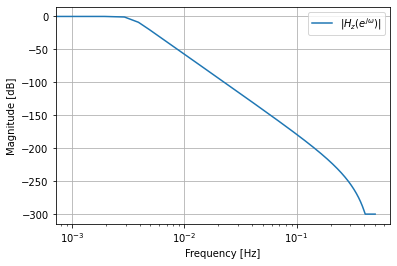

In [174]:
ordem = 6
wc = 2*np.pi/3
fs = 100
filts = signal.lti(*signal.butter(ordem, wc, btype='lowpass', analog=True, output='ba'))
filtz = signal.dlti(*signal.bilinear(filts.num, filts.den, fs))
wz, hz = signal.freqz(filtz.num, filtz.den)
plt.semilogx(wz*1/(2*np.pi), 20*np.log10(np.abs(hz).clip(1e-15)),label=r'$|H_z(e^{j \omega})|$')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()
print(filts)
print(filtz)
print(signal.dlti(*signal.tf2zpk(filtz.num, filtz.den)))


ZerosPolesGainContinuous(
array([0]),
array([0.99439072+0.02011853j]),
1,
dt: None
)
[1 0 1 0 1 0]
ZerosPolesGainContinuous(
array([0]),
array([0.99439072-0.02011853j]),
1,
dt: None
)
[ 1.        +0.j          0.98999078+0.03434137j  4.38615134+0.16667946j
 10.13210223+0.66893062j 29.05847289+2.37880798j 76.68949682+7.98891203j]
ZerosPolesGainContinuous(
array([0]),
array([0.98519414+0.01459194j]),
1,
dt: None
)
[  1.        +0.j           2.68607679+0.00463324j
  13.07816418+0.02504293j  45.19572047+0.10150522j
 154.59471546+0.36566244j 499.49912289+1.23476681j]
ZerosPolesGainContinuous(
array([0]),
array([0.98519414-0.01459194j]),
1,
dt: None
)
[1.00000000e+00+0.00000000e+00j 5.55017587e+00+7.13157943e-02j
 3.25632490e+01+5.92693424e-01j 1.41893211e+02+3.45379880e+00j
 5.66216721e+02+1.68241347e+01j 2.10322211e+03+7.36439551e+01j]
ZerosPolesGainContinuous(
array([0]),
array([0.97995615+0.00531584j]),
1,
dt: None
)
[1.00000000e+00 +0.j         1.04302045e+01 +0.01671173j
 7.39569525e+

/home/osmar/.local/lib/python3.8/site-packages/scipy/signal/ltisys.py:2165: ComplexWarning: Casting complex values to real discards the imaginary part
  xout[i] = (dot(xout[i-1], Ad) + dot(U[i-1], Bd0) + dot(U[i], Bd1))
/home/osmar/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


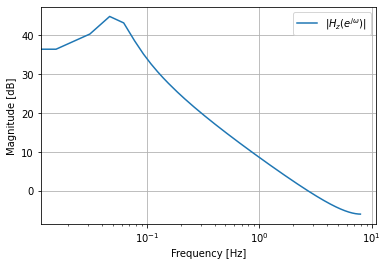

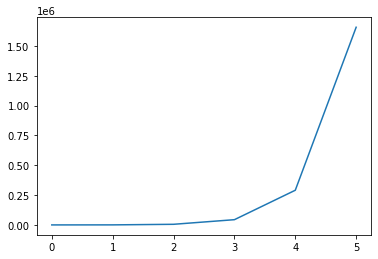

In [213]:
### Para fazer a forma cascata ###
# Iniciar com sistema em formato zpk
######################################################################################
ordem = 6
wc = 2*np.pi/3
fs = 100
filts = signal.lti(*signal.butter(ordem, wc, btype='lowpass', analog=True, output='ba'))
filtz = signal.dlti(*signal.bilinear(filts.num, filts.den, fs))
####################################################################################3
siszpk = signal.dlti(*signal.tf2zpk(filtz.num, filtz.den))
### Polos
filterList = []
for i in siszpk.poles:
    filterList.append(signal.ZerosPolesGain(0, [i], 1))
for i in siszpk.zeros:
    filterList.append(signal.ZerosPolesGain([i], 0, 1))
### Exemplo ####
wz, hz = signal.freqz_zpk(filterList[0].zeros, filterList[0].poles, filterList[0].gain, fs=100)
plt.semilogx(wz*1/(2*np.pi), 20*np.log10(np.abs(hz).clip(1e-15)),label=r'$|H_z(e^{j \omega})|$')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()

x = np.array([1, 0, 1, 0, 1, 0]) # colocar sinal de entrada aqui
for i in filterList:
    print(i)
    print(x)
    tout, x, xout = i.output(x, [1, 2, 3, 4, 5, 6])
plt.figure(2)
plt.plot(x)
